In [2]:
!pip install pandas

In [3]:
#Task 1: Initial Exploration & Cleaning
import pandas as pd


In [5]:
df=pd.read_csv('/content/construction_project_progress_data.csv')

In [6]:
df.head()

,ProjectID,ProjectName,Stage,Substage,StartDate,PlannedEndDate,ActualEndDate,ProgressPercentage,BudgetAllocated,BudgetUtilized,TeamAssigned,RiskLevel,IssuesReported
0,1037,Mall Development,Construction,Final Assembly,2023-04-08,2023-07-06,2023-06-30,41.96,174906,73389.33,Team Beta,Medium,8
1,1052,Office Tower,Engineering,Site Survey,2023-04-24,2023-07-18,2023-07-17,89.04,496017,441638.86,Team Gamma,Low,6
2,1025,Bridge Development,Construction,Foundation Laying,2023-05-25,2023-07-01,2023-07-01,70.61,354007,249973.69,Team Omega,Medium,7
3,1049,Bridge Development,Procurement,Material Sourcing,2023-10-23,2023-12-01,2023-11-23,88.92,449110,399357.07,Team Beta,Medium,4
4,1085,Office Tower,Procurement,Vendor Selection,2023-03-28,2023-05-14,2023-05-05,99.21,346679,343930.43,Team Beta,Medium,4


In [7]:
df.shape

(100, 13)

In [8]:
df.describe().sum()

,0
ProjectID,6.430352e+03
ProgressPercentage,5.110466e+02
BudgetAllocated,1.930982e+06
BudgetUtilized,1.439173e+06
IssuesReported,1.329445e+02


In [9]:
df.isnull().sum()

,0
ProjectID,0
ProjectName,0
Stage,0
Substage,0
StartDate,0
PlannedEndDate,0
ActualEndDate,29
ProgressPercentage,0
BudgetAllocated,0
BudgetUtilized,0


In [10]:
df.dropna(subset=['ActualEndDate'],inplace=True)

In [11]:
df.isnull().sum()

,0
ProjectID,0
ProjectName,0
Stage,0
Substage,0
StartDate,0
PlannedEndDate,0
ActualEndDate,0
ProgressPercentage,0
BudgetAllocated,0
BudgetUtilized,0


In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71 entries, 0 to 99
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ProjectID           71 non-null     int64  
 1   ProjectName         71 non-null     object 
 2   Stage               71 non-null     object 
 3   Substage            71 non-null     object 
 4   StartDate           71 non-null     object 
 5   PlannedEndDate      71 non-null     object 
 6   ActualEndDate       71 non-null     object 
 7   ProgressPercentage  71 non-null     float64
 8   BudgetAllocated     71 non-null     int64  
 9   BudgetUtilized      71 non-null     float64
 10  TeamAssigned        71 non-null     object 
 11  RiskLevel           71 non-null     object 
 12  IssuesReported      71 non-null     int64  
dtypes: float64(2), int64(3), object(8)
memory usage: 7.8+ KB


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
!pip install matplotlib
!pip install seaborn

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
# Task 2
# 1). Calculate a budget efficiency ratio: [BudgetUtilized/BudgetAllocated]?
df['BudgetEfficiency'] = df['BudgetUtilized'] / df['BudgetAllocated']
df[['ProjectName', 'BudgetAllocated', 'BudgetUtilized', 'BudgetEfficiency']].head()

,ProjectName,BudgetAllocated,BudgetUtilized,BudgetEfficiency
0,Mall Development,174906,73389.33,0.419593
1,Office Tower,496017,441638.86,0.890370
2,Bridge Development,354007,249973.69,0.706126
3,Bridge Development,449110,399357.07,0.889219
4,Office Tower,346679,343930.43,0.992072


In [18]:
# 2). Identify projects that exceeded their budget.
df['ExceededBudget'] = df['BudgetUtilized'] > df['BudgetAllocated']
df[['ProjectName', 'BudgetAllocated', 'BudgetUtilized', 'ExceededBudget']].head()


,ProjectName,BudgetAllocated,BudgetUtilized,ExceededBudget
0,Mall Development,174906,73389.33,False
1,Office Tower,496017,441638.86,False
2,Bridge Development,354007,249973.69,False
3,Bridge Development,449110,399357.07,False
4,Office Tower,346679,343930.43,False


In [19]:
# 3).Analyse if specific project types tend to have higher budget utilization?
df.groupby('ProjectName')['BudgetUtilized'].mean()

,BudgetUtilized
ProjectName,
Bridge Development,231912.889545
Mall Development,229915.720588
Office Tower,183772.995789
Residential Complex,217440.240000


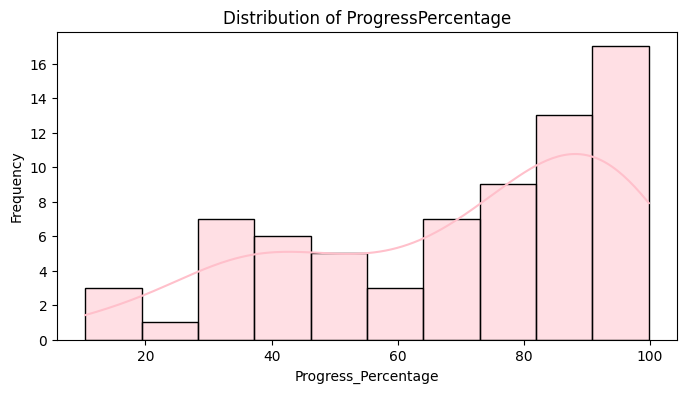

In [20]:
# Task 3
# 1). Use a histogram to show the distribution of ProgressPercentage.
plt.figure(figsize=(8, 4))
sns.histplot(df['ProgressPercentage'], bins=10,kde=True,color='pink')
plt.xlabel('Progress_Percentage')
plt.ylabel('Frequency')
plt.title('Distribution of ProgressPercentage')
plt.show()

In [21]:
# 2). Plot a bar chart comparing Delays across different project stages?
df['ActualEndDate']=pd.to_datetime(df['ActualEndDate'])
df['PlannedEndDate']=pd.to_datetime(df['PlannedEndDate'])
df['Delay']=df['ActualEndDate']-df['PlannedEndDate']
df.head()

,ProjectID,ProjectName,Stage,Substage,StartDate,PlannedEndDate,ActualEndDate,ProgressPercentage,BudgetAllocated,BudgetUtilized,TeamAssigned,RiskLevel,IssuesReported,BudgetEfficiency,ExceededBudget,Delay
0,1037,Mall Development,Construction,Final Assembly,2023-04-08,2023-07-06,2023-06-30,41.96,174906,73389.33,Team Beta,Medium,8,0.419593,False,-6 days
1,1052,Office Tower,Engineering,Site Survey,2023-04-24,2023-07-18,2023-07-17,89.04,496017,441638.86,Team Gamma,Low,6,0.890370,False,-1 days
2,1025,Bridge Development,Construction,Foundation Laying,2023-05-25,2023-07-01,2023-07-01,70.61,354007,249973.69,Team Omega,Medium,7,0.706126,False,0 days
3,1049,Bridge Development,Procurement,Material Sourcing,2023-10-23,2023-12-01,2023-11-23,88.92,449110,399357.07,Team Beta,Medium,4,0.889219,False,-8 days
4,1085,Office Tower,Procurement,Vendor Selection,2023-03-28,2023-05-14,2023-05-05,99.21,346679,343930.43,Team Beta,Medium,4,0.992072,False,-9 days


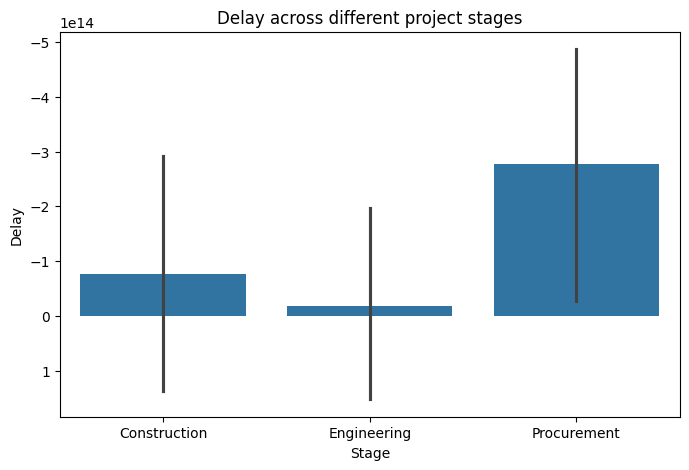

In [22]:

plt.figure(figsize=(8,5))
sns.barplot(x="Stage",y='Delay',data=df)
plt.xlabel('Stage')
plt.ylabel('Delay')
plt.title('Delay across different project stages')
plt.show()

In [23]:
df

,ProjectID,ProjectName,Stage,Substage,StartDate,PlannedEndDate,ActualEndDate,ProgressPercentage,BudgetAllocated,BudgetUtilized,TeamAssigned,RiskLevel,IssuesReported,BudgetEfficiency,ExceededBudget,Delay
0,1037,Mall Development,Construction,Final Assembly,2023-04-08,2023-07-06,2023-06-30,41.96,174906,73389.33,Team Beta,Medium,8,0.419593,False,-6 days
1,1052,Office Tower,Engineering,Site Survey,2023-04-24,2023-07-18,2023-07-17,89.04,496017,441638.86,Team Gamma,Low,6,0.890370,False,-1 days
2,1025,Bridge Development,Construction,Foundation Laying,2023-05-25,2023-07-01,2023-07-01,70.61,354007,249973.69,Team Omega,Medium,7,0.706126,False,0 days
3,1049,Bridge Development,Procurement,Material Sourcing,2023-10-23,2023-12-01,2023-11-23,88.92,449110,399357.07,Team Beta,Medium,4,0.889219,False,-8 days
4,1085,Office Tower,Procurement,Vendor Selection,2023-03-28,2023-05-14,2023-05-05,99.21,346679,343930.43,Team Beta,Medium,4,0.992072,False,-9 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,1098,Residential Complex,Construction,Final Assembly,2023-05-25,2023-07-29,2023-08-07,16.51,292685,48313.13,Team Alpha,Low,6,0.165069,False,9 days
91,1003,Residential Complex,Construction,Site Preparation,2023-06-25,2023-09-15,2023-09-05,75.38,495056,373167.20,Team Beta,Low,8,0.753788,False,-10 days
94,1021,Bridge Development,Construction,Foundation Laying,2023-06-26,2023-09-12,2023-09-04,71.56,340071,243361.17,Team Gamma,Low,3,0.715619,False,-8 days
95,1029,Office Tower,Procurement,Vendor Selection,2023-07-28,2023-10-06,2023-10-08,51.14,164182,83964.92,Team Delta,Low,0,0.511414,False,2 days


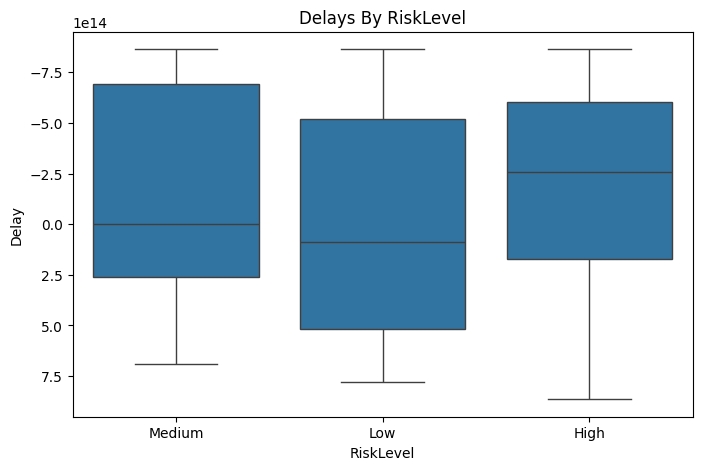

In [24]:
# 3). Create a box plot to understand the spread of delays by RiskLevel.
plt.figure(figsize=(8,5))
sns.boxplot(x='RiskLevel',y='Delay',data=df)
plt.xlabel('RiskLevel')
plt.ylabel('Delay')
plt.title('Delays By RiskLevel')
plt.show()

In [25]:
# Task 4
# 1). Calculate summary statistics for numerical columns.
summary=df.describe()
print(summary)

         ProjectID                 PlannedEndDate  \
count    71.000000                             71   
mean   1046.788732  2023-09-12 05:04:13.521126656   
min    1000.000000            2023-02-21 00:00:00   
25%    1023.000000            2023-06-16 12:00:00   
50%    1046.000000            2023-09-15 00:00:00   
75%    1068.500000            2023-12-12 12:00:00   
max    1100.000000            2024-03-04 00:00:00   
std      27.647224                            NaN   

                       ActualEndDate  ProgressPercentage  BudgetAllocated  \
count                             71           71.000000        71.000000   
mean   2023-09-10 22:38:52.394366208           69.616479    298563.549296   
min              2023-02-15 00:00:00           10.460000    102021.000000   
25%              2023-06-15 00:00:00           49.115000    208067.000000   
50%              2023-09-07 00:00:00           77.460000    300319.000000   
75%              2023-12-07 12:00:00           89.505000    

In [26]:
# 2). Compare BudgetAllocated and BudgetUtilized between High and Low Risk projects using a t-test.
from scipy.stats import ttest_ind

high_risk_budget = df[df['RiskLevel'] == 'High']['BudgetUtilized'].dropna()
low_risk_budget = df[df['RiskLevel'] == 'Low']['BudgetUtilized'].dropna()

ttest_result = ttest_ind(high_risk_budget, low_risk_budget)
print(ttest_result)

TtestResult(statistic=np.float64(-1.1591456368316662), pvalue=np.float64(0.2526489778016443), df=np.float64(44.0))


In [27]:
# 3). Comment on whether higher-risk projects tend to have a larger variance in budget utilization.
print(df.groupby('RiskLevel')['BudgetUtilized'].var())

RiskLevel
High      9.172302e+09
Low       2.012488e+10
Medium    1.999013e+10
Name: BudgetUtilized, dtype: float64


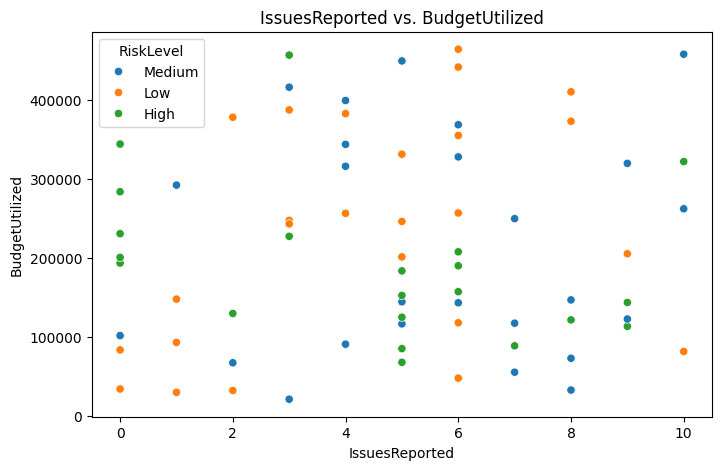

In [28]:
#Task-5
# 1).  Create a scatter plot of IssuesReported vs. BudgetUtilized with color differentiation for RiskLevel.
plt.figure(figsize=(8,5))
sns.scatterplot(x='IssuesReported', y='BudgetUtilized', hue='RiskLevel', data=df)
plt.xlabel('IssuesReported')
plt.ylabel('BudgetUtilized')
plt.title('IssuesReported vs. BudgetUtilized')
plt.show()

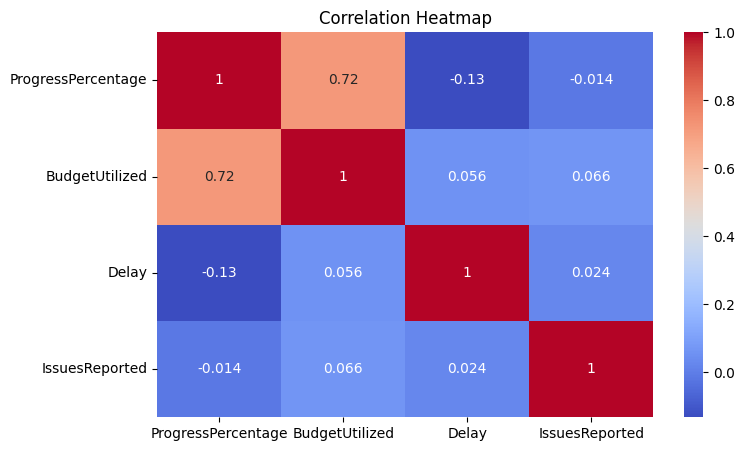

In [35]:
# 2). Use a heatmap to show correlations among numeric columns, focusing on ProgressPercentage, BudgetUtilized, Delays, and IssuesReported.
corr_matrix = df[['ProgressPercentage', 'BudgetUtilized', 'Delay', 'IssuesReported']].corr()
plt.figure(figsize=(8,5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [31]:
#Task-6:-1. Calculate the mean ProgressPercentage for projects in each Stage.
df.groupby('Stage')['ProgressPercentage'].mean()

,ProgressPercentage
Stage,
Construction,44.612963
Engineering,90.096800
Procurement,78.200000


In [33]:
#2.Determine the top 3 stages with the highest average ProgressPercentage.
df.groupby('Stage')['ProgressPercentage'].mean().nlargest(3)   #nlargest is used to find larger values top N in a seires or column in df.

,ProgressPercentage
Stage,
Engineering,90.096800
Procurement,78.200000
Construction,44.612963


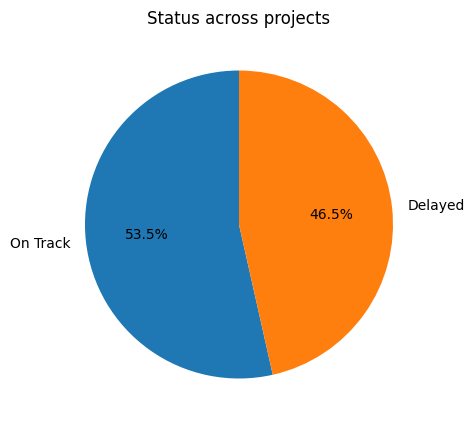

In [32]:
# 3). Create a pie chart to show the proportion of Status (e.g., On Track, Delayed) across projects.
df['Status'] = df['ActualEndDate'] <= df['PlannedEndDate']
df['Status'] = df['Status'].map({True: 'On Track', False: 'Delayed'})
status_counts = df['Status'].value_counts()
plt.figure(figsize=(8,5))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Status across projects')
plt.show()